In [ ]:
#next is to get the lines data for that we need to get the csv file of trains data
import pandas as pd
df = pd.read_csv('final.tsv', sep = "\t", names=['Station','Line'])
#these Line values dont start and end with [] so adding that
'''def add_brackets(text):
    return "[" + text + "]"'''
# Apply the function to the 'line' column
#df['Line'] = df['Line'].apply(add_brackets)
df.head()

,Station,Line
0,Baker Street,"metropolitan, bakerloo, circle, jubilee, hamme..."
1,Bank,"waterloo-city, northern, central"
2,Barbican,"metropolitan, circle, hammersmith-city"
3,Battersea Power Station,northern
4,Bond Street,"central, jubilee"


In [ ]:
lines_data = ['bakerloo','central','district1','district2','circle','jubilee','metropolitan','northern','piccadilly','victoria','hammersmith-city','waterloo-city']
#now using the data we calculate our line dictionary

all_lines = lines_data
for item in all_lines:
  result_pairs = {}
  for item in all_lines:
    item_list = []
    for index, row in df.iterrows():
        line_list = []
        il = row['Line'].split(',')
        for i in il:
          line_list.append(i.strip())
        bleh = row['Station']
        if item in line_list:
          print
          for p in line_list:
            if p == item:
              continue
            else:
              item_list.append([bleh,p])

    result_pairs[item] = item_list
result_pairs['circle']

[['Baker Street', 'metropolitan'],
 ['Baker Street', 'bakerloo'],
 ['Baker Street', 'jubilee'],
 ['Baker Street', 'hammersmith-city'],
 ['Barbican', 'metropolitan'],
 ['Barbican', 'hammersmith-city'],
 ['Cannon Street', 'district2'],
 ['Edgware Road (Circle Line)', 'hammersmith-city'],
 ['Edgware Road (Circle Line)', 'district1'],
 ['Embankment', 'district2'],
 ['Embankment', 'bakerloo'],
 ['Embankment', 'northern'],
 ['Euston Square', 'metropolitan'],
 ['Euston Square', 'hammersmith-city'],
 ["King's Cross St Pancras", 'hammersmith-city'],
 ["King's Cross St Pancras", 'metropolitan'],
 ["King's Cross St Pancras", 'northern piccadilly'],
 ["King's Cross St Pancras", 'victoria'],
 ['Liverpool Street', 'metropolitan'],
 ['Liverpool Street', 'central'],
 ['Liverpool Street', 'hammersmith-city'],
 ['Monument', 'district2'],
 ['Moorgate', 'metropolitan'],
 ['Moorgate', 'northern'],
 ['Moorgate', 'hammersmith-city'],
 ['Paddington', 'district1'],
 ['Paddington', 'bakerloo'],
 ['Paddington', 

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

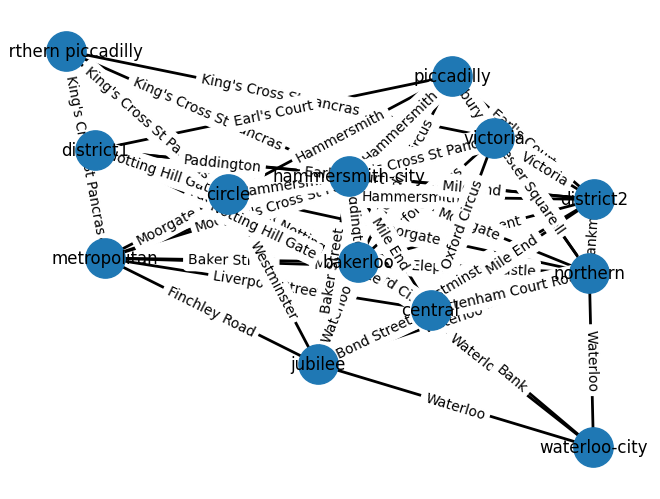

In [ ]:
# Create a graph
G = nx.Graph()

# Create a dictionary to track nodes by color
color_nodes = {}

# Add nodes and edges with attributes
for color, connections in result_pairs.items():
    if color not in color_nodes:
        G.add_node(color)
        color_nodes[color] = G.number_of_nodes() - 1


    for _, line in connections:
        G.add_edge(color, line, connection=_)  # Store the edge name as the connection

# Draw the graph
pos = nx.spring_layout(G)  # You can choose different layout algorithms
labels = {node: node for node in G.nodes()}  # Node labels
edge_labels = nx.get_edge_attributes(G, 'connection')  # Get edge labels

nx.draw(G, pos, with_labels=True, labels=labels, width=2.0, node_size=800)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Add edge labels

# Show the graph
plt.show()

In [ ]:
from collections import deque
def bfs_find_shortest_path(graph, start, end):
    queue = deque()
    queue.append([start])
    while queue:
        path = queue.popleft()
        node = path[-1]
        if node == end:
            return path
        if node in graph:
            for line in graph[node]:
                new_path = list(path)
                new_path.append(line)
                queue.append(new_path)
    return None

start_line = 'dark blue'
end_line = 'silver'
shortest_path = bfs_find_shortest_path(G, start_line, end_line)

if shortest_path:
    print("Shortest path from {} to {}:".format(start_line, end_line))
    print(shortest_path)
else:
    print("No path found from {} to {}".format(start_line, end_line))

No path found from dark blue to silver


In [ ]:
def bfs_find_shortest_path(graph, start, end):
    queue = deque()
    queue.append((start, []))
    visited = set()

    while queue:
        node, edge_path = queue.popleft()
        if node == end:
            return [edge_info['connection'] for edge_info in edge_path]  # Return a list of connection names

        if node in graph and node not in visited:
            visited.add(node)
            for neighbor, edge_name in graph[node].items():
                if neighbor not in visited:
                    new_edge_path = edge_path + [edge_name]
                    queue.append((neighbor, new_edge_path))

    return None

# Example usage: Find the shortest path from 'dark blue' to 'silver'
start_line = 'dark blue'
end_line = 'silver'
edge_path = bfs_find_shortest_path(G, start_line, end_line)

print(edge_path)

['Piccadilly Circus', 'Waterloo']


In [ ]:
from collections import deque

def bfs_find_shortest_path(graph, start, end):
    queue = deque()
    queue.append((start, [], [start]))  # Add a list to store the node names
    visited = set()

    while queue:
        node, edge_path, node_path = queue.popleft()
        if node == end:
            return [edge_info['connection'] for edge_info in edge_path], node_path  # Return connection names and node names

        if node in graph and node not in visited:
            visited.add(node)
            for neighbor, edge_name in graph[node].items():
                if neighbor not in visited:
                    new_edge_path = edge_path + [edge_name]
                    new_node_path = node_path + [neighbor]
                    queue.append((neighbor, new_edge_path, new_node_path))

    return None, None  # Return both lists as None if no path is found

# Example usage: Find the shortest path from 'dark blue' to 'silver'

In [ ]:
lines_data = ['bakerloo','central','district1','district2','circle','jubilee','metropolitan','northern','piccadilly','victoria','hammersmith-city','waterloo-city']

# Create an empty list to store the pairs as lists
pairs = []

for i in range(len(lines_data)):
    for j in range(len(lines_data)):
        if i != j:  # Ensure that the elements are different
            pair = [lines_data[i], lines_data[j]]  # Use square brackets to create a list
            pairs.append(pair)

print(pairs)

[['bakerloo', 'central'], ['bakerloo', 'district1'], ['bakerloo', 'district2'], ['bakerloo', 'circle'], ['bakerloo', 'jubilee'], ['bakerloo', 'metropolitan'], ['bakerloo', 'northern'], ['bakerloo', 'piccadilly'], ['bakerloo', 'victoria'], ['bakerloo', 'hammersmith-city'], ['bakerloo', 'waterloo-city'], ['central', 'bakerloo'], ['central', 'district1'], ['central', 'district2'], ['central', 'circle'], ['central', 'jubilee'], ['central', 'metropolitan'], ['central', 'northern'], ['central', 'piccadilly'], ['central', 'victoria'], ['central', 'hammersmith-city'], ['central', 'waterloo-city'], ['district1', 'bakerloo'], ['district1', 'central'], ['district1', 'district2'], ['district1', 'circle'], ['district1', 'jubilee'], ['district1', 'metropolitan'], ['district1', 'northern'], ['district1', 'piccadilly'], ['district1', 'victoria'], ['district1', 'hammersmith-city'], ['district1', 'waterloo-city'], ['district2', 'bakerloo'], ['district2', 'central'], ['district2', 'district1'], ['distric

In [ ]:
final_ans = []
for pair in pairs:
  loop_dict = {}
  #get the start and end line
  loop_dict['line1'] = '"'+pair[0]+'"'
  loop_dict['line2'] = '"'+pair[1]+'"'
  edge, node = bfs_find_shortest_path(G, pair[0], pair[1])
  edge_text = ''
  for item in edge:
    edge_text += '"' + item + '" '
  node_text = ''
  for item in node:
    node_text += '"' + item + '" '
  loop_dict['switchlist'] = edge_text.rstrip()
  loop_dict['cswitchlist'] = node_text.rstrip()
  final_ans.append(loop_dict)

KeyboardInterrupt: ignored

In [ ]:
final_df = pd.DataFrame(final_ans)
final_df.head(30)

,line1,line2,switchlist,cswitchlist
0,"""bakerloo""","""central""","""Oxford Circus""","""bakerloo"" ""central"""
1,"""bakerloo""","""district1""","""Paddington""","""bakerloo"" ""district1"""
2,"""bakerloo""","""district2""","""Embankment""","""bakerloo"" ""district2"""
3,"""bakerloo""","""circle""","""Paddington""","""bakerloo"" ""circle"""
4,"""bakerloo""","""jubilee""","""Waterloo""","""bakerloo"" ""jubilee"""
5,"""bakerloo""","""metropolitan""","""Baker Street""","""bakerloo"" ""metropolitan"""
6,"""bakerloo""","""northern""","""Elephant & Castle""","""bakerloo"" ""northern"""
7,"""bakerloo""","""piccadilly""","""Piccadilly Circus""","""bakerloo"" ""piccadilly"""
8,"""bakerloo""","""victoria""","""Oxford Circus""","""bakerloo"" ""victoria"""
9,"""bakerloo""","""hammersmith-city""","""Paddington""","""bakerloo"" ""hammersmith-city"""


In [ ]:
final_df.to_csv('switch.csv')

In [ ]:
template = '(switch (line1 {}) (line2 {}) (switchlist {}) (cswitchlist {}))\n'
with open('switch_facts.txt', 'w') as file:
  for item in final_ans:
    temp = template.format(item['line1'], item['line2'],item['switchlist'], item['cswitchlist'])
    file.write(temp)

In [ ]:
from collections import deque

def bfs_find_alternative_paths(graph, start, end, max_switches=4, max_alternatives=3):
    queue = deque()
    queue.append((start, [], [start], 0))  # Add a list to store the node names and keep track of the number of switches
    visited = set()
    alternatives = []

    while queue:
        node, edge_path, node_path, switches = queue.popleft()
        if node == end:
            alternatives.append(([edge_info['connection'] for edge_info in edge_path], node_path))
            if len(alternatives) >= max_alternatives:
                return alternatives

        if node in graph and node not in visited:
            visited.add(node)
            for neighbor, edge_name in graph[node].items():
                if neighbor not in visited and switches < max_switches:
                    new_edge_path = edge_path + [edge_name]
                    new_node_path = node_path + [neighbor]
                    new_switches = switches + 1
                    queue.append((neighbor, new_edge_path, new_node_path, new_switches))

    return alternatives


In [ ]:
start_line = 'purple'
end_line = 'black'

alternatives = bfs_find_alternative_paths(G, start_line, end_line, max_switches = 4, max_alternatives = 20)

if alternatives:
    for i, (edge_path, node_path) in enumerate(alternatives):
        print(f"Alternative Route {i + 1}:")
        print("Switches:", len(edge_path))
        print("Connection Names:", edge_path)
        print("Node Names:", node_path)
        print()
else:
    print("No alternative routes found within the specified constraints.")


Alternative Route 1:
Switches: 1
Connection Names: ['Moorgate']
Node Names: ['purple', 'black']

Alternative Route 2:
Switches: 2
Connection Names: ['Baker Street', 'Elephant & Castle']
Node Names: ['purple', 'brown', 'black']

Alternative Route 3:
Switches: 2
Connection Names: ['Liverpool Street', 'Tottenham Court Road']
Node Names: ['purple', 'red', 'black']

Alternative Route 4:
Switches: 2
Connection Names: ['Moorgate', 'Moorgate']
Node Names: ['purple', 'yellow', 'black']

Alternative Route 5:
Switches: 2
Connection Names: ['Finchley Road', 'Waterloo']
Node Names: ['purple', 'silver', 'black']

Alternative Route 6:
Switches: 2
Connection Names: ['Moorgate', 'Moorgate']
Node Names: ['purple', 'pink', 'black']



In [ ]:
final_ans = []
max_switches = 5  # Adjust this as needed
max_alternatives = 30  # Adjust this as needed

for pair in pairs:
    start_line = pair[0]
    end_line = pair[1]

    # Find alternative routes
    alternatives = bfs_find_alternative_paths(G, start_line, end_line, max_switches, max_alternatives)

    if alternatives:
        for i, (alt_edge, alt_node) in enumerate(alternatives):
            alt_loop_dict = {
                'line1': f'"{start_line}"',
                'line2': f'"{end_line}"',
            }
            alt_edge_text = ' '.join(['"' + item + '"' for item in alt_edge])
            alt_node_text = ' '.join(['"' + item + '"' for item in alt_node])

            alt_loop_dict['switchlist'] = alt_edge_text
            alt_loop_dict['cswitchlist'] = alt_node_text
            final_ans.append(alt_loop_dict)
    else:
        print(f"No alternative routes found for {start_line} to {end_line} within the specified constraints.")

# Print or use final_ans as needed


In [ ]:
final_df = pd.DataFrame(final_ans)
final_df.head(30)

,line1,line2,switchlist,cswitchlist
0,"""bakerloo""","""central""","""Oxford Circus""","""bakerloo"" ""central"""
1,"""bakerloo""","""central""","""Baker Street"" ""Liverpool Street""","""bakerloo"" ""metropolitan"" ""central"""
2,"""bakerloo""","""central""","""Paddington"" ""Notting Hill Gate""","""bakerloo"" ""circle"" ""central"""
3,"""bakerloo""","""central""","""Waterloo"" ""Bond Street""","""bakerloo"" ""jubilee"" ""central"""
4,"""bakerloo""","""central""","""Paddington"" ""Mile End""","""bakerloo"" ""hammersmith-city"" ""central"""
5,"""bakerloo""","""central""","""Elephant & Castle"" ""Tottenham Court Road""","""bakerloo"" ""northern"" ""central"""
6,"""bakerloo""","""central""","""Embankment"" ""Mile End""","""bakerloo"" ""district2"" ""central"""
7,"""bakerloo""","""district1""","""Paddington""","""bakerloo"" ""district1"""
8,"""bakerloo""","""district1""","""Paddington"" ""Notting Hill Gate""","""bakerloo"" ""circle"" ""district1"""
9,"""bakerloo""","""district1""","""Paddington"" ""Paddington""","""bakerloo"" ""hammersmith-city"" ""district1"""


In [ ]:
final_df.shape

(602, 4)

In [ ]:
template = '(switch (line1 {}) (line2 {}) (switchlist {}) (cswitchlist {}))\n'
with open('switch_facts.txt', 'w') as file:
  for item in final_ans:
    temp = template.format(item['line1'], item['line2'],item['switchlist'], item['cswitchlist'])
    file.write(temp)

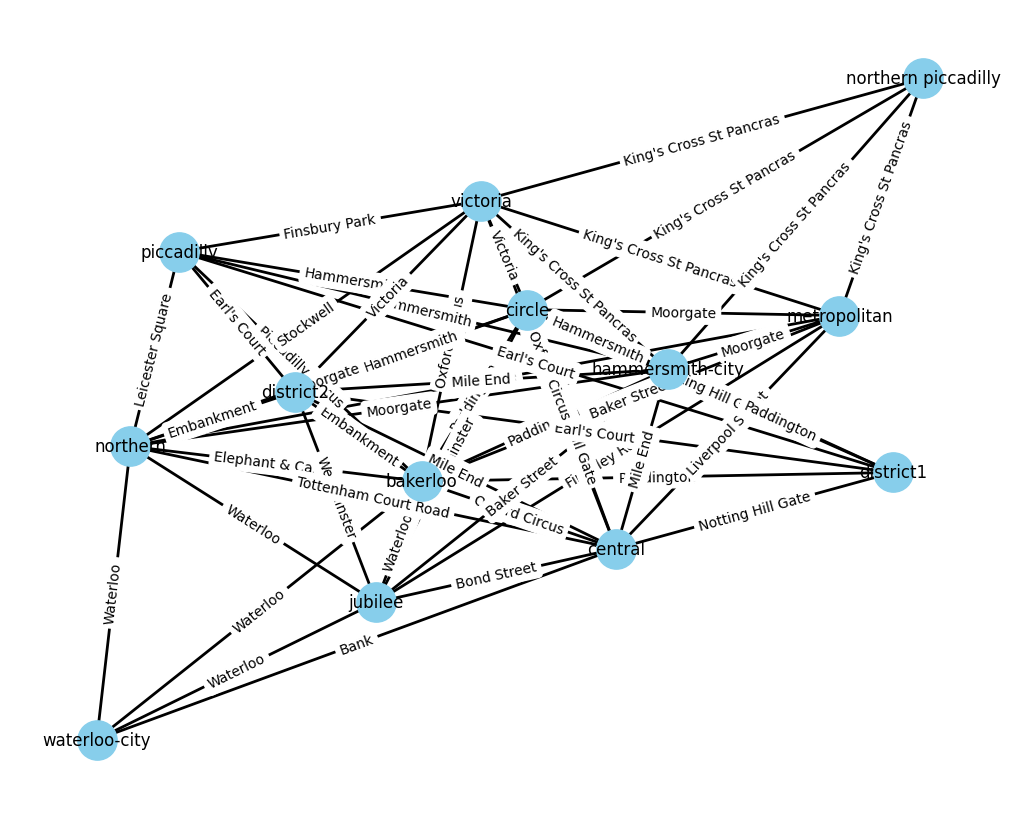

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Create a dictionary to track nodes by color
color_nodes = {}

# Add nodes and edges with attributes
for color, connections in result_pairs.items():
    if color not in color_nodes:
        G.add_node(color)
        color_nodes[color] = G.number_of_nodes() - 1

    for _, line in connections:
        G.add_edge(color, line, connection=_)  # Store the edge name as the connection

# Choose a different layout algorithm for better visualization
pos = nx.spring_layout(G)

# Increase the figure size to fit the graph
plt.figure(figsize=(10, 8))

# Draw the graph
labels = {node: node for node in G.nodes()}  # Node labels
edge_labels = nx.get_edge_attributes(G, 'connection')  # Get edge labels

nx.draw(G, pos, with_labels=True, labels=labels, width=2.0, node_size=800, node_color='skyblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Add edge labels

# Show the graph
plt.show()
